# **Tarefa 1**: Álgebra Linear e Otimização para ML -  MO431A
Universidade Estadual de Campinas (UNICAMP), Instituto de Computação (IC)

Prof. Jacques Wainer, 2021s1


In [1]:
# RA & Name
print('265673: ' + 'Gabriel Luciano Gomes')
print('192880: ' + 'Lucas Borges Rondon')
print('265674: ' + 'Paulo Júnio Reis Rodrigues')

265673: Gabriel Luciano Gomes
192880: Lucas Borges Rondon
265674: Paulo Júnio Reis Rodrigues


## Imports necessários para a tarefa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

## Leitura da base de dados

In [3]:
X = np.load('db/dados.npy')

### Impressão das três primeiras imagens da base de dados

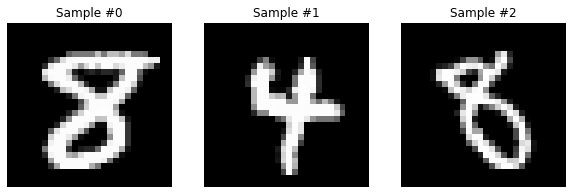

In [4]:
fig = plt.figure(figsize=(10, 7))

for i in range(3):
    #reshape figure    
    img = np.reshape(X[i], (28, 28))
    
    #positioning figure
    fig.add_subplot(1, 3, i+1)  
    
    # showing image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Sample #{0}".format(i))
    plt.imshow(img, cmap=cm.gray)
    

### Normalização do Conjunto de Dados

In [5]:
X = Normalizer().transform(X)

## Fatoração da Matriz

In [6]:
## Full Matrix
U, D, Vt = np.linalg.svd(X, full_matrices=True)
# Shape das matrizes
print(f'U  full matriz shape = {U.shape}')  #Autovectors
print(f'D  full matriz shape = {D.shape}')  #Autovalues
print(f'Vt full matriz shape = {Vt.shape}') #Orthogonal


## Compact Matrix
Uc, Dc, Vtc = np.linalg.svd(X, full_matrices=False)
# Shape das matrizes compactas
print(f'U  compact matriz shape = {Uc.shape}')  #Autovectors
print(f'D  compact matriz shape = {Dc.shape}')  #Autovalues
print(f'Vt compact matriz shape = {Vtc.shape}') #Orthogonal

U  full matriz shape = (10500, 10500)
D  full matriz shape = (784,)
Vt full matriz shape = (784, 784)
U  compact matriz shape = (10500, 784)
D  compact matriz shape = (784,)
Vt compact matriz shape = (784, 784)


## Redução de Dimensões

### Redução para 100 dimensões

In [7]:
pca = PCA(n_components=100)
pca.fit(X)
reducedMatrix = pca.transform(X)

# Shape of reduced Matrix
print(f'Reduced Matrix shape: {reducedMatrix.shape}')


Reduced Matrix shape: (10500, 100)


### Matriz reconstruída

In [8]:
reconstruct_matrix = pca.inverse_transform(reducedMatrix)

print(f'Reconstruct matrix shape: {reconstruct_matrix.shape}')

Reconstruct matrix shape: (10500, 784)


## Impressão das três primeiras imagens reconstruídas

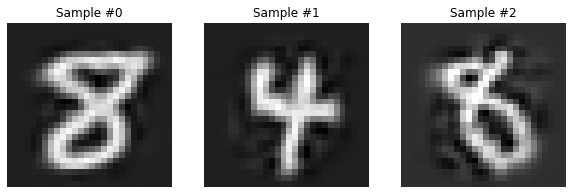

In [9]:
fig = plt.figure(figsize=(10, 7))

for i in range(3):
    #reshape figure    
    img = np.reshape(reconstruct_matrix[i], (28, 28))
    
    #positioning figure
    fig.add_subplot(1, 3, i+1)  
    
    # showing image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Sample #{0}".format(i))
    plt.imshow(img, cmap=cm.gray)
    

## Impressão dos três primeiros Eigen-dígitos

In [10]:
# Compute U, D and Vt matrices for the reduced matrix
U_reduced, D_reduced, Vt_reduced = np.linalg.svd(reducedMatrix, full_matrices=False)

print(f'Digit #0: \n{Vt_reduced[0]} \n')
print(f'Digit #1: \n {Vt_reduced[1]} \n')
print(f'Digit #2: \n{Vt_reduced[2]}')



Digit #0: 
[ 1.00000000e+00 -3.39766684e-16  7.19365625e-16  7.35533261e-17
 -2.23864569e-16 -4.88467613e-17 -2.49493038e-17 -7.19728316e-17
  7.91527060e-18 -1.07121253e-16  8.03888728e-17 -9.02664543e-17
  9.07183736e-17  1.08761487e-16 -9.53791070e-17  1.46863699e-16
 -4.85135242e-17  2.95167094e-18  2.93319179e-16 -7.99369643e-17
 -3.22482217e-16  5.99683506e-16  2.39320145e-16 -7.29759155e-16
  2.60092543e-16 -2.67665526e-15 -4.24632868e-16 -1.46713089e-15
  1.07406139e-15  1.18939669e-15  6.76687107e-15  2.93496091e-15
 -1.18524249e-14 -8.72681947e-15 -1.78041176e-15 -6.39395062e-15
  4.83368621e-17 -4.09400267e-15 -5.81523851e-16  1.39129500e-14
  9.52863401e-15 -1.51142546e-14  3.30715826e-14 -4.86003281e-14
 -6.66363671e-15  1.58000109e-14  7.44159390e-15 -1.30957891e-14
  2.23348608e-14  1.27310833e-14  3.54397325e-14  5.81677890e-14
 -6.62394285e-14  2.28348979e-14 -1.05621882e-13 -5.09246788e-14
  7.06129313e-14 -6.58783287e-15 -1.92992521e-13 -2.35853176e-15
 -1.85300246e-

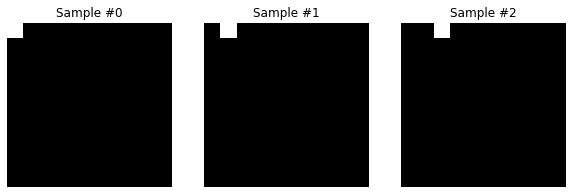

In [16]:
## Exemplo dos eigen-digitos Vt reduzido

fig = plt.figure(figsize=(10, 10))
# The eigen values are the bases of the reduced subspace, thus Vt will be used
for i in range(3):
    #reshape figure    
    img = np.reshape(Vt_reduced[i], (10, 10))
    
    #positioning figure
    fig.add_subplot(1, 3, i+1)  
    
    # showing image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Sample #{0}".format(i))
    plt.imshow(img, cmap=cm.gray)

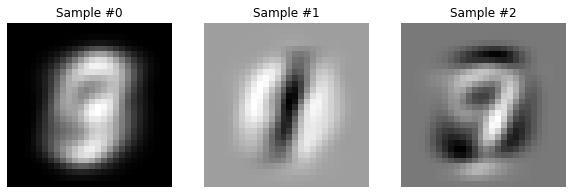

In [11]:
## Exemplo dos eigen-digitos 

fig = plt.figure(figsize=(10, 10))
# The eigen values are the bases of the reduced subspace, thus Vt will be used
for i in range(3):
    #reshape figure    
    img = np.reshape(Vt[i], (28, 28))
    
    #positioning figure
    fig.add_subplot(1, 3, i+1)  
    
    # showing image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Sample #{0}".format(i))
    plt.imshow(img, cmap=cm.gray)
    

## Decisão do número de dimensões

In [12]:
### Quantas dimensões manter, seguindo a regra do singular values > 1

pca = PCA(n_components=271)
pca.fit(X)
reducedMatrix_SV = pca.transform(X)
_, d_sv, _ = np.linalg.svd(reducedMatrix_SV, full_matrices=False)

print(f'Dimension = 271: \n{d_sv} \n')

pca = PCA(n_components=272)
pca.fit(X)
reducedMatrix_SV = pca.transform(X)
_, d_sv, _ = np.linalg.svd(reducedMatrix_SV, full_matrices=False)

print(f'Dimension = 272: \n{d_sv} \n')

pca = PCA(n_components=273)
pca.fit(X)
reducedMatrix_SV = pca.transform(X)
_, d_sv, _ = np.linalg.svd(reducedMatrix_SV, full_matrices=False)

print(f'Dimension = 273: \n{d_sv} \n')


Dimension = 271: 
[24.51434288 21.43744457 19.17619695 17.5770927  17.05931516 16.00231653
 14.00159945 13.47501055 12.59501385 12.16161005 11.44954515 11.02509206
 10.44599499 10.11402987  9.87969893  9.64052497  9.11089116  8.87856643
  8.58417009  8.29615847  8.11199601  8.02389258  7.82169358  7.70312277
  7.5896568   7.47133427  7.08977191  7.04697554  6.93245047  6.86556306
  6.59010844  6.54521171  6.26687166  6.13278505  6.00575661  5.94428514
  5.85083872  5.77089225  5.68175232  5.64338019  5.48822746  5.36674803
  5.2107998   5.16211478  5.11429388  5.06978195  4.91267062  4.83181728
  4.7912345   4.64802365  4.61708609  4.59911137  4.5125278   4.44330892
  4.38900387  4.31910455  4.25508196  4.2100488   4.14278335  4.11408033
  4.07507434  4.0382842   3.97260353  3.86713814  3.8603942   3.80136052
  3.74986391  3.69529344  3.62987587  3.57312063  3.56705989  3.53389097
  3.47773835  3.45126165  3.42048281  3.37125543  3.29817338  3.25471654
  3.23353396  3.20057022  3.13364

### Conclusão
Seguindo a regra de singular values > 1, deve-se manter 272 dimensões

In [13]:
### Capturar 80% da variância

# calcular variância da matriz compacta
sd_value = Dc.sum() * (8/10) # 80% do valor
print(f'80% of value: {sd_value}')

r_list = [50, 75, 125, 150, 200, 250, 275, 276, 300]

for r in r_list:
    pca = PCA(n_components=r)
    pca.fit(X)
    reducedMatrix_SD = pca.transform(X)
    _, d_sd, _ = np.linalg.svd(reducedMatrix_SD, full_matrices=False)
    print(f'Sum of D = {d_sd.sum()} \t for r = [{r}]')

print('Best value of r = 276')

80% of value: 899.2620814269975
Sum of D = 451.05904369035204 	 for r = [50]
Sum of D = 550.3992344229432 	 for r = [75]
Sum of D = 682.2646361552922 	 for r = [125]
Sum of D = 731.0378384900312 	 for r = [150]
Sum of D = 809.4309337755165 	 for r = [200]
Sum of D = 871.6934374729149 	 for r = [250]
Sum of D = 898.4175028599229 	 for r = [275]
Sum of D = 899.3764217283363 	 for r = [276]
Sum of D = 922.722794346364 	 for r = [300]
Best value of r = 276


### Conclusão
Seguindo a regra de capturar 80% da variância, deve-se manter 276 dimensões

In [14]:
### Capturar 95% da variância

# calcular variância da matriz compacta
sd_value = Dc.sum() * (95/100) # 95% do valor
print(f'95% of value: {sd_value}')

r_list = [500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750]

for r in r_list:
    pca = PCA(n_components=r)
    pca.fit(X)
    reducedMatrix_SD = pca.transform(X)
    _, d_sd, _ = np.linalg.svd(reducedMatrix_SD, full_matrices=False)
    print(f'Sum of D = {d_sd.sum()} \t for r = [{r}]')
    
print('Best value of r = 675')


95% of value: 1067.8737216945594
Sum of D = 1043.803764210441 	 for r = [500]
Sum of D = 1050.6158148615561 	 for r = [525]
Sum of D = 1056.082571101441 	 for r = [550]
Sum of D = 1060.0963342652944 	 for r = [575]
Sum of D = 1063.0339158642344 	 for r = [600]
Sum of D = 1065.0181081493117 	 for r = [625]
Sum of D = 1066.0698635258873 	 for r = [650]
Sum of D = 1066.346406008531 	 for r = [675]
Sum of D = 1066.3464060085312 	 for r = [700]
Sum of D = 1066.3464060085314 	 for r = [725]
Sum of D = 1066.3464060085312 	 for r = [750]
Best value of r = 675


### Conclusão
Seguindo a regra de capturar 95% da variância, deve-se manter 675 dimensões